## Load parameters and calculate quiescent luminosity, assign spectral class and  if not already

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
import specmatchemp.library
import specmatchemp.plots as smplot
import glob
warnings.filterwarnings("ignore")

from f_6_7_8 import merged_spec_class, Mbol_to_Lum, kepler_luminosity, L_quieterr

cluster_dict = {'M67':['M67','M67', 15, 4.0, 908.],
                'M44':['M44','M44', 47, 0.73, 160.],
                'Pleiades':['Pleiades','Pleiades',0.,0.100,135.]
               }
DM = lambda x: 5.*np.log10(float(x))-5. 

#------------------------------------------------
cluster = 'M67'
test = 'run_06'
l = 'stars_shortlist/{0}/results/{1}/catalog/{0}_parameter.csv'.format(cluster, test)
lback = 'stars_shortlist/{0}/results/{1}/catalog/{0}_parameter_backup.csv'.format(cluster, test)
#------------------------------------------------

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
basics = cluster_dict[cluster]
dm = DM(basics[4])
global dm

print(glob.glob(l))

# if glob.glob(l) != []:
#     specs = pd.read_csv(lback, index_col='EPIC')
   
specs = pd.read_csv(l, index_col='EPIC')
# if 'L_quiet_bol_err' not in specs.columns.values:
wavmin, wavmax = 3480., 9700.
lib = specmatchemp.library.read_hdf(wavlim=[wavmin,wavmax])
#print(lib.library_params.columns.values)
specs = merged_spec_class(specs)

L_quiet, L_quiet_bol, L_quiet_err, L_quiet_bol_err = [],[],[],[], 
todrop1, whydrop1 = [], [] 

i=0
for oid in specs.index.values:
    print(i,oid)
    i+=1
    L_quiet_bol.append(Mbol_to_Lum(specs.Mbol[oid]))
    L_quiet_bol_err.append(Mbol_to_Lum(specs.Mbol[oid],specs.Mbol_err[oid],err=True,))
    Lq = kepler_luminosity(cluster,specs['T'][oid],specs.R_Rsun[oid],lib)
    
    if str(Lq) == 'nan':
        todrop1.append(True)
        whydrop1.append('noLum')
        L_quiet_err.append(np.nan)
    else:
        todrop1.append(False)
        whydrop1.append(None)
        L_quiet_err.append(L_quieterr(cluster,Lq,
                                    specs.R_Rsun[oid],
                                    specs.R_Rsun_err[oid],
                                    specs['T'][oid],
                                    specs['T_err'][oid],
                                    lib,))
    L_quiet.append(Lq)

specs['L_quiet'] = L_quiet
specs['L_quiet_bol'] = L_quiet_bol
specs['L_quiet_err'] = L_quiet_err
specs['L_quiet_bol_err'] = L_quiet_bol_err
specs['todrop1'] = todrop1
specs['whydrop1'] = whydrop1

['stars_shortlist/M67/results/run_06/catalog/M67_parameter.csv']
Reading library from /home/eilin/.specmatchemp/library.h5
0 211389428
3770.0 3970.0 0.35899999999999993 0.7589999999999999 -0.22 0.28
3770.0 3970.0 0.35899999999999993 0.7589999999999999 -0.22 0.28
1 211389537
4940.0 5140.0 0.563 0.9630000000000001 -0.22 0.28
4940.0 5140.0 0.563 0.9630000000000001 -0.22 0.28
2 211389716
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
3 211389931
3900.0 4100.0 0.38700000000000007 0.7870000000000001 -0.22 0.28
3900.0 4100.0 0.38700000000000007 0.7870000000000001 -0.22 0.28
4 211390071
3700.0 3900.0 0.335 0.7350000000000001 -0.22 0.28
3700.0 3900.0 0.335 0.7350000000000001 -0.22 0.28
5 211390107
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
6 211390158
5820.0 6020.0 0.9200000000000002 1.32 -0.22 0.28
5820.0 6020.0 0.9200000000000002 1.32 -0.22 0.28
7 211390800
5390.0 5590.0 0.70900000000

4130.0 4330.0 0.4609999999999999 0.861 -0.22 0.28
4130.0 4330.0 0.4609999999999999 0.861 -0.22 0.28
70 211398233
4520.0 4720.0 0.48900000000000005 0.889 -0.22 0.28
4520.0 4720.0 0.48900000000000005 0.889 -0.22 0.28
71 211398269
4940.0 5140.0 0.563 0.9630000000000001 -0.22 0.28
4940.0 5140.0 0.563 0.9630000000000001 -0.22 0.28
72 211398314
5430.0 5630.0 0.7490000000000001 1.149 -0.22 0.28
5430.0 5630.0 0.7490000000000001 1.149 -0.22 0.28
73 211398504
6070.0 6270.0 1.05 1.45 -0.22 0.28
6070.0 6270.0 1.05 1.45 -0.22 0.28
74 211398541
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
75 211398612
3770.0 3970.0 0.35899999999999993 0.7589999999999999 -0.22 0.28
3770.0 3970.0 0.35899999999999993 0.7589999999999999 -0.22 0.28
76 211398707
3700.0 3900.0 0.335 0.7350000000000001 -0.22 0.28
3700.0 3900.0 0.335 0.7350000000000001 -0.22 0.28
77 211398747
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0

5820.0 6020.0 0.9200000000000002 1.32 -0.22 0.28
143 211409376
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
144 211409560
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
145 211409644
5180.0 5380.0 0.617 1.0170000000000001 -0.22 0.28
5180.0 5380.0 0.617 1.0170000000000001 -0.22 0.28
146 211409645
4130.0 4330.0 0.4609999999999999 0.861 -0.22 0.28
4130.0 4330.0 0.4609999999999999 0.861 -0.22 0.28
147 211409664
5430.0 5630.0 0.7490000000000001 1.149 -0.22 0.28
5430.0 5630.0 0.7490000000000001 1.149 -0.22 0.28
148 211409862
3400.0 3600.0 0.19299999999999995 0.593 -0.22 0.28
3400.0 3600.0 0.19299999999999995 0.593 -0.22 0.28
149 211410090
3400.0 3600.0 0.19299999999999995 0.593 -0.22 0.28
3400.0 3600.0 0.19299999999999995 0.593 -0.22 0.28
150 211410757
5240.0 5440.0 0.6759999999999999 1.0759999999999998 -0.22 0.28
5240.0 5440.0 0.6759999999999999 1.0759999999999998 -0.22 0.28
151 21141

4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
215 211421905
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
216 211422199
3770.0 3970.0 0.35899999999999993 0.7589999999999999 -0.22 0.28
3770.0 3970.0 0.35899999999999993 0.7589999999999999 -0.22 0.28
217 211422418
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
4730.0 4930.0 0.5290000000000001 0.929 -0.22 0.28
218 211422676
5430.0 5630.0 0.7490000000000001 1.149 -0.22 0.28
5430.0 5630.0 0.7490000000000001 1.149 -0.22 0.28
219 211422704
5180.0 5380.0 0.617 1.0170000000000001 -0.22 0.28
5180.0 5380.0 0.617 1.0170000000000001 -0.22 0.28
220 211422813
3550.0 3750.0 0.26 0.66 -0.22 0.28
3550.0 3750.0 0.26 0.66 -0.22 0.28
221 211423010
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
5390.0 5590.0 0.7090000000000001 1.109 -0.22 0.28
222 211423302
5180.0 5380.0 0.617 1.0170000000000001 -0.22 0.28
5180.0 5380.0 0.617 1.0170000000000001 -0.22 0.28
223 211423434
5180.0 5380.0 0.617 1.0170

## All sorts of sanity checks

In [3]:
specs[['g_r','J-H','H-K','r_i','i_z','z_J','J_H','H_K','R_Rsun','R_Rsun_err',
       'T','T_err','L_quiet','L_quiet_err','L_quiet_bol','L_quiet_bol_err','todrop1','whydrop1']].tail(20)

,g_r,J-H,H-K,r_i,i_z,z_J,J_H,H_K,R_Rsun,R_Rsun_err,T,T_err,L_quiet,L_quiet_err,L_quiet_bol,L_quiet_bol_err,todrop1,whydrop1
EPIC,,,,,,,,,,,,,,,,,,
211428580,NaN,0.324,0.079,NaN,NaN,NaN,NaN,NaN,0.939,0.1878,5590,65.064071,6.398280e+31,1.600631e+31,2.209689e+33,3.561598e+32,False,None
211428596,NaN,0.324,0.079,NaN,NaN,NaN,NaN,NaN,0.939,0.1878,5590,65.064071,6.398280e+31,1.600631e+31,2.209689e+33,3.561598e+32,False,None
211428643,NaN,0.307,0.075,NaN,NaN,NaN,NaN,NaN,0.986,0.1972,5680,30.550505,7.547438e+31,1.682176e+31,3.344500e+33,2.310299e+32,False,None
211428649,0.49,0.310,0.076,0.16,0.06,0.78,0.29,0.03,0.982,0.1964,5660,47.258156,7.345235e+31,1.730864e+31,3.050220e+33,2.107018e+32,False,None
211428722,0.38,0.262,0.067,0.14,0.02,0.71,0.28,0.00,1.120,0.2240,5920,83.266640,1.162512e+32,2.998731e+31,8.401005e+33,3.191765e+33,False,None
211428762,0.78,0.427,0.098,0.24,0.11,0.99,0.51,0.07,0.763,0.1526,5040,171.561456,2.590843e+31,9.295182e+30,2.781834e+32,7.366221e+31,False,None
211428837,0.57,0.342,0.082,0.19,0.06,0.87,0.37,0.04,0.909,0.1818,5490,100.166528,5.450632e+31,1.524435e+31,1.493933e+33,2.235941e+32,False,None
211429032,1.31,0.626,0.193,0.64,0.38,1.29,0.68,0.15,0.559,0.1118,3870,70.000000,3.327837e+30,1.008764e+30,3.752591e+30,6.912528e+29,False,None
211429166,NaN,0.329,0.080,NaN,NaN,NaN,NaN,NaN,0.949,0.1898,5530,50.332230,5.834750e+31,1.399309e+31,2.015261e+33,3.248216e+32,False,None


In [4]:
series = pd.DataFrame({'color counts' : specs[['g_r','J-H','H-K','r_i','i_z','z_J','J_H','H_K']].count()})
#series.to_latex()
series

,color counts
g_r,174
J-H,272
H-K,272
r_i,174
i_z,174
z_J,174
J_H,174
H_K,174


In [5]:
r = specs.L_quiet_err/specs.L_quiet
r.head()

EPIC
211389428    0.303129
211389537    0.358771
211389716    0.279680
211389931    0.290022
211390071    0.330157
dtype: float64

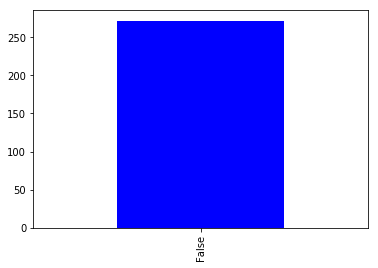

In [6]:
specs['todrop1'].value_counts().plot(kind='bar')

In [7]:
specs.to_csv(l)


## CMD outlier detection

In [105]:
specs = pd.read_csv(l)
from f_6_7_8 import interactive_CMD

colors = [('g_r','SDSS_g','SDSS_r'),
          ('r_i','SDSS_r','SDSS_i'),
          ('i_z','SDSS_i','SDSS_z'),
          ('z_J','SDSS_z','J'),
          ('J_H','J','H'),
          ('H_K','H','K'),
          ('i-z','SDSS_i','SDSS_z'),
          ('z-Y','SDSS_z','SDSS_y'),
          ('J-H','J','H'),
          ('H-K','H','K'),]

for key, c0, c1 in colors:
    print(c0,c1)
    interactive_CMD(specs,cid1=c0,cid2=c1)
    input('Plot for {} done?'.format(key))

SDSS_g SDSS_r
Plot for g_r done?
SDSS_r SDSS_i
Plot for r_i done?
SDSS_i SDSS_z
Plot for i_z done?
SDSS_z J
Plot for z_J done?
J H
Plot for J_H done?
H K
Plot for H_K done?
SDSS_i SDSS_z
Plot for i-z done?
SDSS_z SDSS_y
Plot for z-Y done?
J H
Plot for J-H done?
H K
Plot for H-K done?


In [108]:
outs=pd.DataFrame()
import os
from f_6_7_8 import CMD
for i in range(len(colors)):
    #/home/ekaterina/Documents/appaloosa/stars_shortlist/share/temp/
    file = 'selected-data{}.txt'.format(i)
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file,header=None,sep=' ').T.dropna(how='any')
        df = df.rename(index=str, columns={0:'outlier'})
        df['color'] = colors[i][0]
      #  print(specs.EPIC[df.outlier.astype(int).values].values)
        df['EPIC'] = specs.EPIC[df.outlier.astype(int).values].values
        outs = pd.concat([outs,df],ignore_index=True)

outs = outs.sort_values(by='EPIC')

#specs['todrop'][specs.EPIC.isin(outs.EPIC.tolist())] = True 
td = specs.todrop1.values
whydrop2 = np.chararray(td.shape,itemsize=3,unicode=True)

whydrop2[specs.EPIC.isin(outs.EPIC.tolist()).values] = 'CMD'
whydrop2[~specs.EPIC.isin(outs.EPIC.tolist()).values] = '   '
specs['whydrop2'] = whydrop2
specs['todrop2'] = specs.EPIC.isin(outs.EPIC.tolist()).values

outs.to_csv('stars_shortlist/{0}/results/{1}/catalog/{0}_outliers.csv'.format(cluster,test))
outs = outs.drop_duplicates()

specs['todrop'] = specs.todrop1 | specs.todrop2
specs['whydrop'] = specs.whydrop2 + ' ' +specs.whydrop1.astype(str).apply(lambda x: x.replace('nan','')) 
specs = specs.drop(['todrop1','todrop2','whydrop1','whydrop2'],axis=1)
#specs.whydrop[specs.todrop == True]

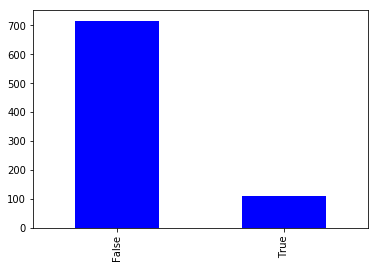

In [109]:
specs['todrop'].value_counts().plot(kind='bar')

## Other immediate exclusion criteria: too hot/cold, no data

In [110]:
specs.todrop[specs['T'] < 3000] = True
specs.todrop[specs['T'] > 6640] = True
specs.todrop[specs['T'] == np.nan] = True
specs.todrop[specs['L_quiet'] == np.nan] = True

specs.whydrop[specs['T'] < 3000] = 'T < 3000 K'
specs.whydrop[specs['T'] > 6640] = 'earlier than F4'
specs.whydrop[specs['T'] == np.nan] = 'no T'
specs.whydrop[specs['L_quiet'] == np.nan] = 'no L'

#intermediate save
specs.to_csv(l)

In [111]:
specs[specs.todrop!=False]

,EPIC,Unnamed: 0,Unnamed: 0.1,angDist,col1,Name,RAJ2000,DEJ2000,OName,Vmag,...,Jmag_abs,T_err,R_Rsun_err,Mbol_err,L_quiet,L_quiet_bol,L_quiet_err,L_quiet_bol_err,todrop,whydrop
10,210804032,76,10,0.738861,774,034447.28+195541.7,56.19704,19.92827,DH354,NaN,...,7.39,51.316014,0.0398,0.250,8.490810e+28,2.015261e+27,2.696387e+28,1.160077e+27,True,CMD
22,210837725,74,22,1.132055,789,034705.34+202639.5,56.77226,20.44432,s4798986,NaN,...,7.06,76.376262,0.0516,0.375,1.996229e+29,1.301162e+28,7.167790e+28,1.123513e+28,True,CMD
41,210877423,57,41,0.535097,697,035612.30+210227.0,59.05127,21.04085,AKV198,10.79,...,NaN,120.138809,0.1628,0.100,3.191610e+31,4.724232e+32,9.789009e+30,1.087795e+32,True,CMD
43,210879932,59,43,1.998573,687,035531.93+210446.2,58.88307,21.07951,PELS079,11.04,...,4.94,210.000000,0.1458,0.140,1.902510e+31,1.459927e+32,7.781031e+30,4.706250e+31,True,CMD
58,210904850,77,58,0.778441,761,033211.53+212756.1,53.04807,21.46559,UGCSJ033211.55+212755.7,NaN,...,NaN,96.436508,0.0298,0.345,4.441170e+28,4.114634e+26,1.887215e+28,3.268632e+26,True,CMD
93,210945519,70,93,0.614886,606,035123.87+220648.2,57.84946,22.11339,HCG420,13.19,...,6.23,76.376262,0.0868,0.125,1.162025e+30,4.724232e+29,3.857145e+29,1.359743e+29,True,CMD
150,210990525,58,150,0.871839,10,033531.68+224925.0,53.88203,22.82362,PELS124,9.86,...,4.50,171.561456,0.1526,0.115,2.590843e+31,2.781834e+32,9.295182e+30,7.366221e+31,True,CMD
162,210996662,32,162,0.785082,389,034722.89+225519.6,56.84541,22.92212,HII1407,8.13,...,NaN,144.222051,0.3860,0.045,NaN,2.846631e+36,NaN,2.949575e+35,True,earlier than F4
164,210997197,63,164,0.812713,420,034740.97+225548.0,56.92073,22.93001,HII1553,12.49,...,5.77,117.898261,0.1308,0.155,6.020849e+30,1.394220e+31,2.155680e+30,4.975980e+30,True,CMD
167,210998086,59,167,0.143318,824,040344.16+225639.4,60.93402,22.94430,PELS174,9.73,...,4.94,210.000000,0.1458,0.140,1.902510e+31,1.459927e+32,7.781031e+30,4.706250e+31,True,CMD


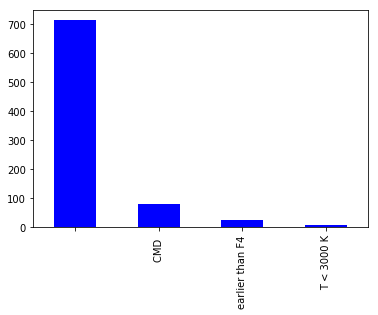

In [112]:
specs.whydrop.value_counts().plot(kind='bar')

## CMD plots

In [ ]:
from pandas.api.types import CategoricalDtype
from f_6_7_8 import spec_class_hist
categor = ['{}{}'.format(c,num) for c in list('OBAFGKM') for num in list(range(10))]
type_ = CategoricalDtype(categories=categor, ordered=True)
specs.spec_class.astype(type_)
s = specs.sort_values(by='spec_class')
spec_class_hist(s,cluster,type_)

In [ ]:
from f_6_7_8 import CMD
outliers = outs.EPIC.drop_duplicates().tolist()
for key, c0, c1 in colors:
    CMD(specs,cluster,cid1=c0,cid2=c1,colour=key, ylim=(18,9),outliers=outliers)#,colour=key

In [ ]:
CMD(specs,cluster,cid1='gmag',cid2='imag',color='g_i',ylim=(21,8))#19,5
CMD(specs,cluster,cid1='J',cid2='K',color='J_K',ylim=(18,6))#14,5
CMD(specs,cluster,cid1='rmag',cid2='zmag',color='r_z',ylim=(20,8))#18,5
CMD(specs,cluster,cid1='gmag',cid2='zmag',color='g_z',ylim=(20,9))#18,5